In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
import warnings
import ast
import re
import xlrd

from my_func import *

warnings.filterwarnings('ignore')

url = "C:/Users/Nimrod/Documents/mid_projects_tests/flo_data_20k.csv"

df = pd.read_csv(url)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

## Checking for na's & duplicates

In [3]:
df.isna().any()

master_id                            False
order_channel                        False
last_order_channel                   False
first_order_date                     False
last_order_date                      False
last_order_date_online               False
last_order_date_offline              False
order_num_total_ever_online          False
order_num_total_ever_offline         False
customer_value_total_ever_offline    False
customer_value_total_ever_online     False
interested_in_categories_12          False
dtype: bool

In [4]:
df.duplicated().any()

False

## Data Cleaning 

### Numerical columns

- Creation of total_num_orders & customer_total_value using aggragation of other columns 

- Removing of of the columns used to aggregate the data

In [5]:
num_df = number_df(df)

## Date Columns 

### Converting to date type 


### Creation of total date coulmns

In [6]:
date_df_converter(df)

,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,total_lifetime_days,time_from_last_order_days,active_days,order_freq_per_month
0,2020-10-30,2021-02-26,2021-02-21,2021-02-26,1195,1076,119,1.260504
1,2017-02-08,2021-02-16,2021-02-16,2020-01-10,2555,1086,1469,0.428863
2,2019-11-27,2020-11-27,2020-11-27,2019-12-01,1533,1167,366,0.409836
3,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1127,1116,11,5.454545
4,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1649,1067,582,0.103093
...,...,...,...,...,...,...,...,...
19940,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1600,1312,288,0.312500
19941,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1438,1142,296,0.202703
19942,2019-09-11,2021-05-24,2021-05-24,2019-09-11,1610,989,621,0.144928
19943,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1778,1089,689,0.261248


## Categorical Encoding


### One Hot Encoding 

In [7]:
cat_encoding(df)

,android_app,desktop,ios_app,mobile
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
19940,1,0,0,0
19941,0,1,0,0
19942,0,0,1,0
19943,1,0,0,0


__interested_in_categories_12 columns appears to be a list like string.__ 

__Required converting into a list, mapping and replacing values & preforming get dummies that allows for more than one value in a row to have the value of 1__ 

In [8]:
print(len(df['interested_in_categories_12'][1]), "\n", df['interested_in_categories_12'][1])

32 
 [ERKEK, COCUK, KADIN, AKTIFSPOR]


In [9]:
type(df['interested_in_categories_12'][0])

str

In [10]:
df_intrest = df['interested_in_categories_12']

In [11]:
dummies(df)

,children,children_sports,men,sports,women
0,0,0,0,0,1
1,1,0,1,1,1
2,0,0,1,0,1
3,1,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
19940,0,0,1,1,0
19941,0,0,0,1,0
19942,0,0,0,1,0
19943,0,0,1,1,0


## Concat

num_df ,date_df, encoded_df, cat_df

In [12]:
combined_df = pd.concat([number_df(df), date_df_converter(df), dummies(df), cat_encoding(df)], axis=1)

In [13]:
combined_df.head()

,total_num_orders,customer_total_value,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,total_lifetime_days,time_from_last_order_days,active_days,order_freq_per_month,children,children_sports,men,sports,women,android_app,desktop,ios_app,mobile
0,5.0,939.37,2020-10-30,2021-02-26,2021-02-21,2021-02-26,1195,1076,119,1.260504,0,0,0,0,1,1,0,0,0
1,21.0,2013.55,2017-02-08,2021-02-16,2021-02-16,2020-01-10,2555,1086,1469,0.428863,1,0,1,1,1,1,0,0,0
2,5.0,585.32,2019-11-27,2020-11-27,2020-11-27,2019-12-01,1533,1167,366,0.409836,0,0,1,0,1,1,0,0,0
3,2.0,121.97,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1127,1116,11,5.454545,1,1,0,0,0,1,0,0,0
4,2.0,209.98,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1649,1067,582,0.103093,0,0,0,1,0,0,1,0,0


## Data Distrabution


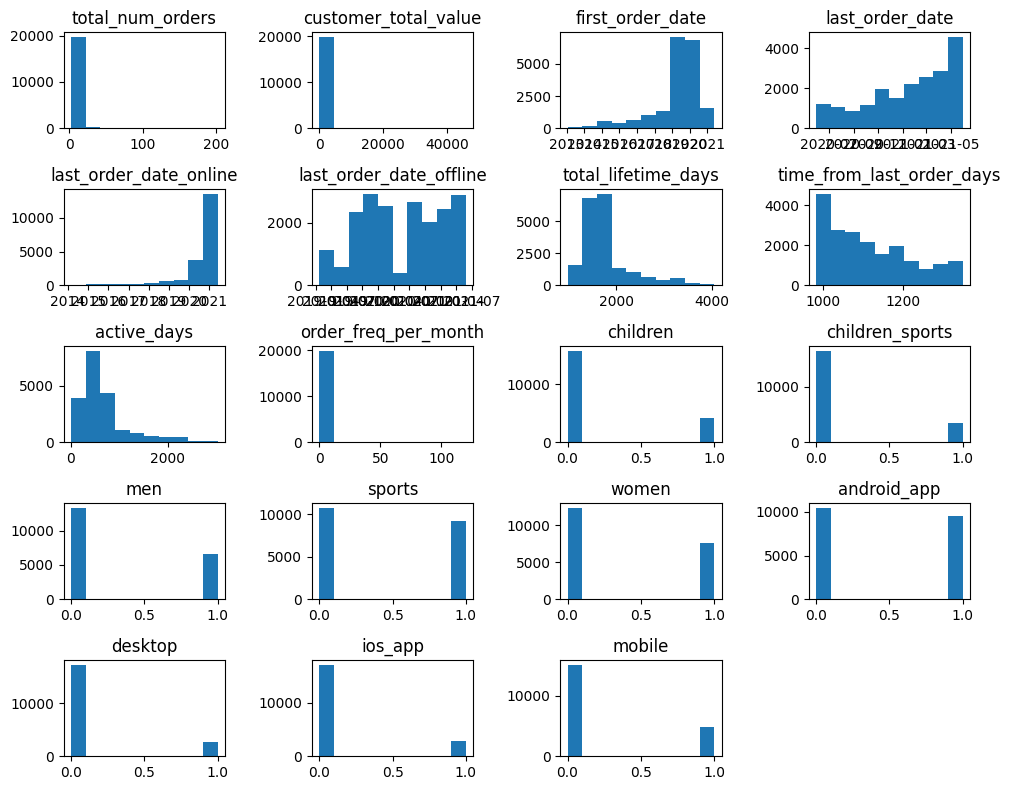

In [14]:

combined_df.hist(figsize=(10,8), grid=False)
plt.tight_layout()

<AxesSubplot: >

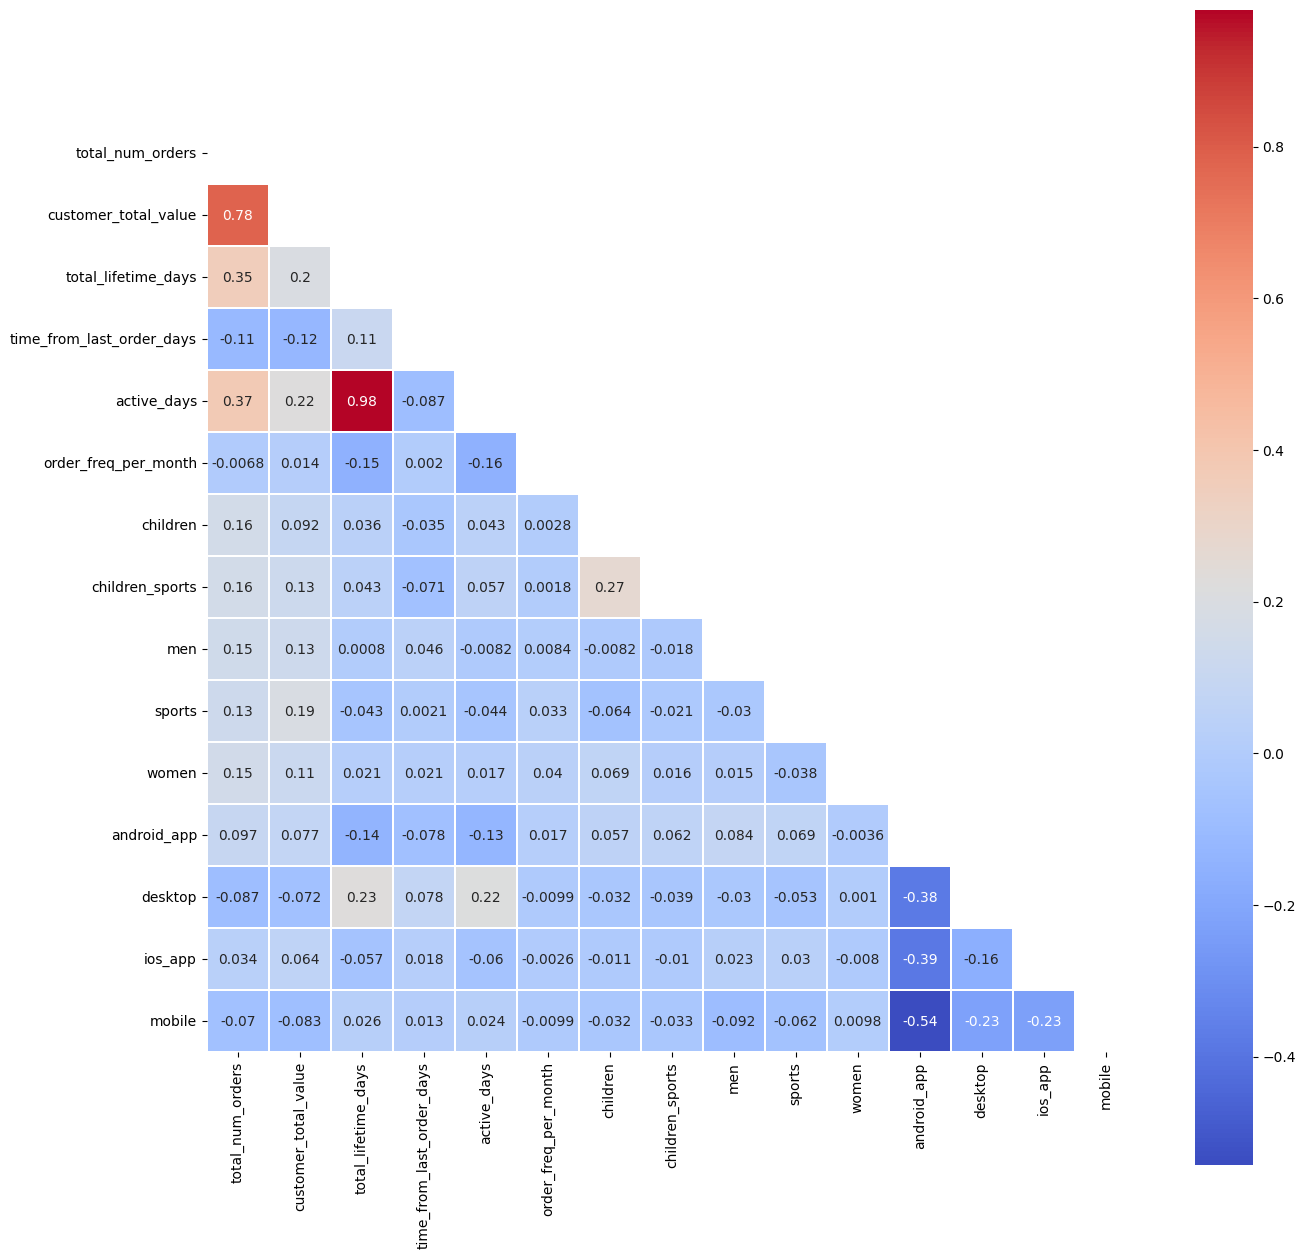

In [15]:
corr = combined_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, mask=mask , cmap='coolwarm', square=True, linewidth=.2)

## Outliers flagging & Removal

Z-score outlier removal did not provide better results.

IQR provided a raise in R^2 of ~6% 

In [16]:
# # Calculate Z-scores for each data point
# z_scores = (combined_df['customer_total_value'] - combined_df['customer_total_value'].mean()) / combined_df['customer_total_value'].std()

# # Define threshold for outlier detection
# threshold = 3

# # Identify outliers based on Z-scores
# outliers = combined_df[np.abs(z_scores) > threshold]

# # Remove outliers from the DataFrame
# cleaned_df = combined_df[np.abs(z_scores) <= threshold]

# cleaned_df


In [17]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.1)
    quartile3 = dataframe[variable].quantile(0.9)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit,0)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit,0)
    
columns = ["total_num_orders",
           "customer_total_value",
           "total_lifetime_days",
           "time_from_last_order_days"]
for col in columns:
    replace_with_thresholds(combined_df, col)

## Data splitting 

In [18]:
combined_df['monthly_profitability']= round(combined_df['customer_total_value']/(combined_df['active_days']/30),2)
combined_df['monthly_profitability'] = combined_df['monthly_profitability'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [19]:
to_drop = ['customer_total_value', 'first_order_date','last_order_date',
           'last_order_date_online', 'last_order_date_offline', 'monthly_profitability']

X = combined_df.drop(to_drop, axis=1)

y = combined_df[['monthly_profitability']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=42, test_size=0.25)

### Scalling & Model fit 

Tried several different scalers and applied on different columns.
The results as far as better distrubation were achived but no major changes to R^2.

Found that when nothing is scaled the model preforms better.

In [21]:
# lm = LinearRegression()

# model = lm.fit(X_train, y_train)

In [22]:
# ## Test model results

# y_pred = model.predict(X_test)

# ## Training model reslults 

# y_train_pred = model.predict(X_train)

In [23]:
# Add a constant to the independent variables (for the intercept term)
X_train_with_intercept = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_train_with_intercept).fit()

# Get the summary of the model
summary = model.summary()

# Get the predicted values for the test set
X_test_with_intercept = sm.add_constant(X_test)
y_pred = model.predict(X_test_with_intercept)
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])

# Print the summary
print(summary)

                              OLS Regression Results                             
Dep. Variable:     monthly_profitability   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     6618.
Date:                   Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:41:20   Log-Likelihood:            -1.0186e+05
No. Observations:                  14958   AIC:                         2.037e+05
Df Residuals:                      14945   BIC:                         2.038e+05
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Model Results

In [24]:
# Calculate the performance metrics
RMSE = np.sqrt(mse(y_test, y_pred))
MAE = mae(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'\nModel Interpretation Test:\n{"*"*26}\nMAE:{MAE}\nRMSE: {RMSE}\nR2: {round(R2,10)*100}%\n')

# RMSE_train = np.sqrt(mse(y_train, y_train_pred))
# MAE_train = mae(y_train, y_train_pred)
# R2_train = r2_score(y_train, y_train_pred)

# print(f'\nModel Interpretation Train:\n{"*"*26}\nMAE:{MAE_train}\nRMSE: {RMSE_train}\nR2: {round(R2_train,10)*100}%')


Model Interpretation Test:
**************************
MAE:34.165428901987234
RMSE: 156.62997413371832
R2: 85.11945372000001%



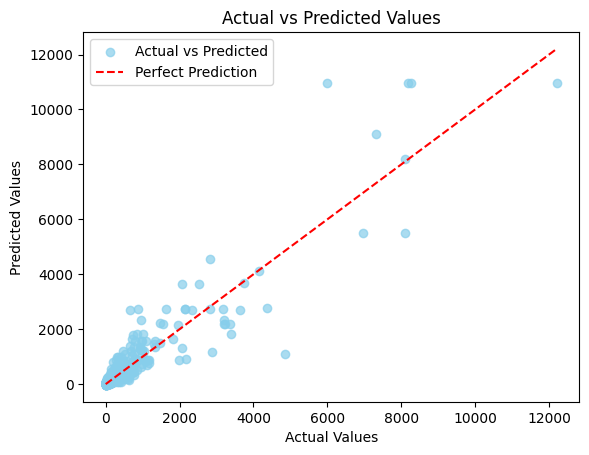

In [25]:
plt.scatter(y_test, y_pred, color='skyblue',alpha=0.7, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


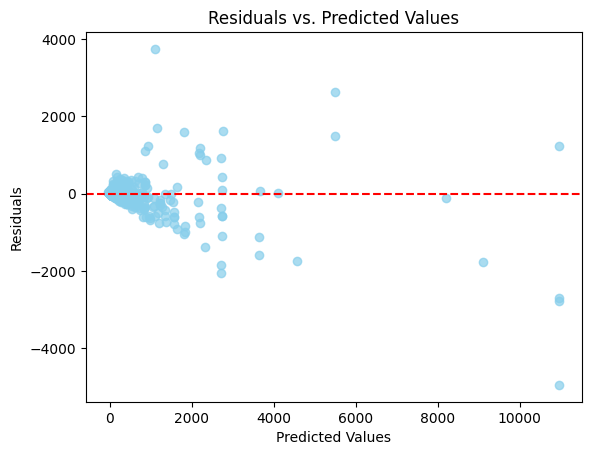

In [26]:
# Homoscedasticity
residuals = y_test['monthly_profitability'] - y_pred['y_pred']

# Create scatter plot
plt.scatter(y_pred, residuals, alpha=0.7, color='skyblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()


## Real Data Prediction

In [28]:
#  C:/Users/Nimrod/Documents/mid_projects_tests/flo_data_20k.csv

while True:
    try:
        url = input('Enter path to csv file: ')
        df = pd.read_csv(url)
        break  
    except FileNotFoundError:
        print("File not found. Please enter a valid file path.")



# Data cleaning, preparing & merging back to one df  

try:
    combined_df = pd.concat([number_df(df), date_df_converter(df), dummies(df), cat_encoding(df)], axis=1)
except:
    print('Merging of Data Failed')

# Removing of Outliers 

try:
    columns = ["total_num_orders",
               "customer_total_value",
               "total_lifetime_days",
               "time_from_last_order_days"]

    for col in columns:
        replace_with_thresholds(combined_df, col)
except:
    print('Error in outliers cleaning')

    
# Dropping of not needed columns

try:
    to_drop = ['customer_total_value', 'first_order_date','last_order_date',
               'last_order_date_online', 'last_order_date_offline']

    X = combined_df.drop(to_drop, axis=1)


    # Get the predicted values for the test set
    X_with_intercept = sm.add_constant(X)
    y_pred = model.predict(X_with_intercept)
    y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
    results = pd.concat([df, y_pred], axis=1)
    
    # Print the summary
    print(summary)
except:
    print('Error while running model')

try:
    results.to_csv('results_df.csv', mode='w+')
    print('File saved successfully')
except:
    print('File did not save')

Enter path to csv file:  C:/Users/Nimrod/Documents/mid_projects_tests/flo_data_20k.csv


                              OLS Regression Results                             
Dep. Variable:     monthly_profitability   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     6618.
Date:                   Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:41:20   Log-Likelihood:            -1.0186e+05
No. Observations:                  14958   AIC:                         2.037e+05
Df Residuals:                      14945   BIC:                         2.038e+05
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------